In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

## Load raw data

In [2]:
file_path = "./HomeF.csv"
dataset = pd.read_csv(file_path, low_memory=False, index_col="time")

dataset.columns = [col.replace(' [kW]', '') for col in dataset.columns]

time_index = pd.DatetimeIndex(dataset.index)
dataset = dataset.set_index(time_index)
dataset.iloc[np.r_[0:5,-5:0]]

,Usage,Generation,WaterHeater,Solar,Refrigerator,Microwave,Furnace,WaterHeater3,WaterHeater2,WaterHeater1,...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.977402,0.009264,0.296840,0.009264,0.059256,0.002800,0.008474,0.000531,0.020002,0.277369,...,10.00,Clear,8.33,1023.40,12.83,0.00,284.00,0.0000,3.360,0.00
2014-01-01 00:15:00,0.377746,0.009904,0.063231,0.009904,0.003734,0.002914,0.008633,0.000471,0.009642,0.054060,...,10.00,Clear,8.37,1023.39,12.13,0.00,284.25,0.0000,3.255,0.00
2014-01-01 00:30:00,0.420196,0.010133,0.001511,0.010133,0.121228,0.002630,0.008059,0.000044,0.000011,0.001478,...,10.00,Clear,8.41,1023.38,11.43,0.00,284.50,0.0000,3.150,0.00
2014-01-01 00:45:00,0.290328,0.010029,0.000058,0.010029,0.016986,0.002910,0.008511,0.000411,0.000202,0.000671,...,10.00,Clear,8.45,1023.37,10.73,0.00,284.75,0.0000,3.045,0.00
2014-01-01 01:00:00,0.307616,0.010038,0.000127,0.010038,0.014140,0.002691,0.008500,0.000400,0.000200,0.000727,...,10.00,Clear,8.49,1023.36,10.03,0.00,285.00,0.0000,2.940,0.00
2016-12-31 23:55:00,3.963900,0.008100,0.003200,0.008100,0.001267,0.002783,0.008683,0.001600,0.000600,0.001000,...,8.73,Light Rain,29.47,1011.65,6.45,0.31,186.00,0.0153,31.840,0.56
2016-12-31 23:56:00,4.150650,0.008000,0.003167,0.008000,0.001250,0.002817,0.008733,0.001633,0.000500,0.001033,...,8.73,Light Rain,29.47,1011.65,6.45,0.31,186.00,0.0153,31.840,0.56
2016-12-31 23:57:00,4.571883,0.008733,0.000500,0.008733,0.000667,0.003783,0.009367,0.000467,0.000100,0.000867,...,8.73,Light Rain,29.47,1011.65,6.45,0.31,186.00,0.0153,31.840,0.56
2016-12-31 23:58:00,4.406200,0.008733,0.001200,0.008733,0.000500,0.003950,0.009483,0.000467,0.000367,0.001300,...,8.73,Light Rain,29.47,1011.65,6.45,0.31,186.00,0.0153,31.840,0.56


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 571987 entries, 2014-01-01 00:00:00 to 2016-12-31 23:59:00
Data columns (total 36 columns):
Usage                  571987 non-null float64
Generation             571987 non-null float64
WaterHeater            571987 non-null float64
Solar                  571987 non-null float64
Refrigerator           571987 non-null float64
Microwave              571987 non-null float64
Furnace                571987 non-null float64
WaterHeater3           571987 non-null float64
WaterHeater2           571987 non-null float64
WaterHeater1           571987 non-null float64
Master_Bdrm            571987 non-null float64
Front_Bdrm             571987 non-null float64
Kit_StoveWall          571987 non-null float64
Dishwasher_Disposal    571987 non-null float64
Kit_SinkWall           571987 non-null float64
Family_Rm              571987 non-null float64
Kit_Half-Bath_Foyer    571987 non-null float64
Washing_Machine        571987 non-null float64
Guest_Bdr

In [4]:
dataset.isna().sum()

Usage                  0
Generation             0
WaterHeater            0
Solar                  0
Refrigerator           0
Microwave              0
Furnace                0
WaterHeater3           0
WaterHeater2           0
WaterHeater1           0
Master_Bdrm            0
Front_Bdrm             0
Kit_StoveWall          0
Dishwasher_Disposal    0
Kit_SinkWall           0
Family_Rm              0
Kit_Half-Bath_Foyer    0
Washing_Machine        0
Guest_Bdrm_SmkDet      0
Dryer                  0
Basement               0
Phase_B                0
Phase_A                0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

## 取樣時間 (1min -> 15mins)

In [5]:
dataset = dataset.resample('15T').first()
print("Shape of 15mins dataset: {} --> n_rows = {}, n_cols = {}".format(dataset.shape, dataset.shape[0],dataset.shape[1]))

Shape of 15mins dataset: (105216, 36) --> n_rows = 105216, n_cols = 36


In [6]:
dataset.dropna(inplace=True)

## Date encode to 環形時間

In [7]:
hours_in_day = 24
days_in_week = 7
months_in_year = 12
mins_in_hour = 60

dataset['sin_hr'] = np.sin(2*np.pi*dataset.index.hour/hours_in_day)
dataset['cos_hr'] = np.cos(2*np.pi*dataset.index.hour/hours_in_day)
dataset['sin_weekday'] = np.sin(2*np.pi*dataset.index.weekday/days_in_week)
dataset['cos_weekday'] = np.cos(2*np.pi*dataset.index.weekday/days_in_week)
dataset['sin_month'] = np.sin(2*np.pi*dataset.index.month/months_in_year)
dataset['cos_month'] = np.cos(2*np.pi*dataset.index.month/months_in_year)
# dataset['sin_min'] = np.sin(2*np.pi*dataset.index.minute/mins_in_hour)
# dataset['cos_min'] = np.cos(2*np.pi*dataset.index.minute/mins_in_hour)

dataset['is_holiday'] = dataset.index.weekday.map(lambda x: 1 if x>4 else 0)

dataset.iloc[np.r_[0:5, -5:0]]

,Usage,Generation,WaterHeater,Solar,Refrigerator,Microwave,Furnace,WaterHeater3,WaterHeater2,WaterHeater1,...,precipIntensity,dewPoint,precipProbability,sin_hr,cos_hr,sin_weekday,cos_weekday,sin_month,cos_month,is_holiday
time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.977402,0.009264,0.296840,0.009264,0.059256,0.002800,0.008474,0.000531,0.020002,0.277369,...,0.0000,3.360,0.00,0.000000,1.000000,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 00:15:00,0.377746,0.009904,0.063231,0.009904,0.003734,0.002914,0.008633,0.000471,0.009642,0.054060,...,0.0000,3.255,0.00,0.000000,1.000000,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 00:30:00,0.420196,0.010133,0.001511,0.010133,0.121228,0.002630,0.008059,0.000044,0.000011,0.001478,...,0.0000,3.150,0.00,0.000000,1.000000,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 00:45:00,0.290328,0.010029,0.000058,0.010029,0.016986,0.002910,0.008511,0.000411,0.000202,0.000671,...,0.0000,3.045,0.00,0.000000,1.000000,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 01:00:00,0.307616,0.010038,0.000127,0.010038,0.014140,0.002691,0.008500,0.000400,0.000200,0.000727,...,0.0000,2.940,0.00,0.258819,0.965926,0.974928,-0.222521,5.000000e-01,0.866025,0
2016-12-31 22:45:00,4.404933,0.007467,0.006733,0.007467,0.001500,0.003033,0.009000,0.002667,0.001067,0.003000,...,0.0153,31.840,0.56,-0.500000,0.866025,-0.974928,-0.222521,-2.449294e-16,1.000000,1
2016-12-31 23:00:00,4.326100,0.007600,0.004133,0.007600,0.147567,0.002750,0.008450,0.001833,0.000667,0.001633,...,0.0153,31.840,0.56,-0.258819,0.965926,-0.974928,-0.222521,-2.449294e-16,1.000000,1
2016-12-31 23:15:00,4.651833,0.008200,0.000833,0.008200,0.000550,0.004300,0.010067,0.001033,0.000133,0.000333,...,0.0153,31.840,0.56,-0.258819,0.965926,-0.974928,-0.222521,-2.449294e-16,1.000000,1
2016-12-31 23:30:00,4.412017,0.007500,0.004800,0.007500,0.008500,0.002883,0.008733,0.002167,0.000733,0.001900,...,0.0153,31.840,0.56,-0.258819,0.965926,-0.974928,-0.222521,-2.449294e-16,1.000000,1


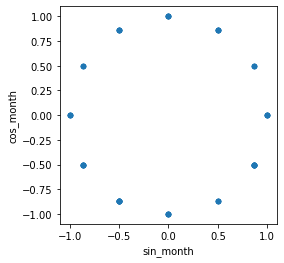

In [8]:
dataset.sample(100).plot.scatter('sin_month','cos_month').set_aspect('equal');

In [9]:
dataset.columns

Index(['Usage', 'Generation', 'WaterHeater', 'Solar', 'Refrigerator',
       'Microwave', 'Furnace', 'WaterHeater3', 'WaterHeater2', 'WaterHeater1',
       'Master_Bdrm', 'Front_Bdrm', 'Kit_StoveWall', 'Dishwasher_Disposal',
       'Kit_SinkWall', 'Family_Rm', 'Kit_Half-Bath_Foyer', 'Washing_Machine',
       'Guest_Bdrm_SmkDet', 'Dryer', 'Basement', 'Phase_B', 'Phase_A',
       'temperature', 'icon', 'humidity', 'visibility', 'summary',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'sin_hr', 'cos_hr', 'sin_weekday', 'cos_weekday', 'sin_month',
       'cos_month', 'is_holiday'],
      dtype='object')

In [10]:
dataset["Furnace"].describe()

count    105204.000000
mean          0.095905
std           0.162381
min           0.000000
25%           0.008800
50%           0.010776
75%           0.114442
max           0.629318
Name: Furnace, dtype: float64

In [11]:
COL_WEATHER = ['temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover','windBearing', 'precipIntensity', 'dewPoint', 'precipProbability']
COL_APPLIANCE = ['WaterHeater', 'Refrigerator', 'Microwave', 'Furnace', 'WaterHeater3', 'WaterHeater2', 'WaterHeater1', 'Kit_StoveWall', 'Dishwasher_Disposal', 'Kit_SinkWall', 'Washing_Machine', 'Dryer']
# COL_DATE = ['sin_hr', 'cos_hr', 'sin_weekday', 'cos_weekday', 'sin_month', 'cos_month', 'sin_min', 'cos_min']
COL_DATE = ['sin_hr', 'cos_hr', 'sin_weekday', 'cos_weekday', 'sin_month', 'cos_month', 'is_holiday']
APPLIANCE = 'Furnace'

## Norm some weather features

In [12]:
COL_NORM = ['temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'windBearing', 'precipIntensity', 'dewPoint']
X = dataset.loc[:, COL_NORM]

In [13]:
ds_norm = MinMaxScaler().fit_transform(X)
dataset.loc[:, COL_NORM] = ds_norm

In [14]:
dataset

,Usage,Generation,WaterHeater,Solar,Refrigerator,Microwave,Furnace,WaterHeater3,WaterHeater2,WaterHeater1,...,precipIntensity,dewPoint,precipProbability,sin_hr,cos_hr,sin_weekday,cos_weekday,sin_month,cos_month,is_holiday
time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.977402,0.009264,0.296840,0.009264,0.059256,0.002800,0.008474,0.000531,0.020002,0.277369,...,0.000000,0.300223,0.00,0.000000,1.000000e+00,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 00:15:00,0.377746,0.009904,0.063231,0.009904,0.003734,0.002914,0.008633,0.000471,0.009642,0.054060,...,0.000000,0.299205,0.00,0.000000,1.000000e+00,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 00:30:00,0.420196,0.010133,0.001511,0.010133,0.121228,0.002630,0.008059,0.000044,0.000011,0.001478,...,0.000000,0.298186,0.00,0.000000,1.000000e+00,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 00:45:00,0.290328,0.010029,0.000058,0.010029,0.016986,0.002910,0.008511,0.000411,0.000202,0.000671,...,0.000000,0.297168,0.00,0.000000,1.000000e+00,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 01:00:00,0.307616,0.010038,0.000127,0.010038,0.014140,0.002691,0.008500,0.000400,0.000200,0.000727,...,0.000000,0.296149,0.00,0.258819,9.659258e-01,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 01:15:00,0.396122,0.010278,0.001511,0.010278,0.124819,0.002258,0.008111,0.000049,0.000002,0.001460,...,0.000000,0.297798,0.00,0.258819,9.659258e-01,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 01:30:00,0.272560,0.010127,0.000118,0.010127,0.002522,0.002678,0.008587,0.000460,0.000233,0.000576,...,0.000000,0.299447,0.00,0.258819,9.659258e-01,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 01:45:00,0.320803,0.010244,0.000298,0.010244,0.023630,0.002581,0.008497,0.000344,0.000198,0.000840,...,0.000000,0.301096,0.00,0.258819,9.659258e-01,0.974928,-0.222521,5.000000e-01,0.866025,0
2014-01-01 02:00:00,0.378931,0.010218,0.001389,0.010218,0.114904,0.002516,0.008121,0.000011,0.000009,0.001369,...,0.000000,0.302745,0.00,0.500000,8.660254e-01,0.974928,-0.222521,5.000000e-01,0.866025,0


## KNN by weather and date


In [15]:
from sklearn.neighbors import NearestNeighbors 

In [16]:
# training
neighs = NearestNeighbors(n_neighbors=200, algorithm='auto', n_jobs=-1).fit(dataset.loc[:, COL_WEATHER+COL_DATE])

In [17]:
# get neighbors
target_neighbors = neighs.kneighbors(dataset.loc[:, COL_WEATHER+COL_DATE], return_distance=False)

In [18]:
target_neighbors[0]

array([     0,      1,      2,      3,  71899,  71898,  71897,  71896,
            4,      5,      6,      7,  71901,  71902,  71900,  71903,
        36959,  36958,    672,  36957,    673,    674,    675,  36956,
         2688,   2689,  37628,   2783,  35704,  35705,   2690,  35706,
         2782,  35707,   2781,  36961,  36962,  36960,   2780,  36963,
        71991,  71990,   2691,  37629,    678,    679,    677,    676,
        72660,   2108,   2109,   2110,   2111,  71989,  37720,  37721,
          767,  37722,  72661,  37723,   2695,  71988,    766,  36287,
        71231,   2694,  71316,  71317,    765,  70552,  72662,   2693,
        71318,  37630,    764,  71319,  70644,  71907,  70553,  71906,
        71230,  71905,  71904,      8,  72663,      9,     10,   2692,
        36286,     11,  70554,  36289,  37716,   2776,  37635,  71984,
         2777,  37717,  70559,   2778,  70555,  70645,  35700,  71985,
        35701,  35702,  36288,  35703,  71229,   2779,  37718,  37631,
      

In [20]:
get_tolerable_power = lambda x: dataset["Furnace"].iloc[x].quantile(.25)
tolerable_power_df = pd.DataFrame([get_tolerable_power(row) for row in target_neighbors], index=dataset.index, columns=["Furnace"])

In [21]:
tolerable_power_df

,Furnace
time,
2014-01-01 00:00:00,0.008594
2014-01-01 00:15:00,0.008594
2014-01-01 00:30:00,0.008594
2014-01-01 00:45:00,0.008594
2014-01-01 01:00:00,0.008606
2014-01-01 01:15:00,0.008594
2014-01-01 01:30:00,0.008591
2014-01-01 01:45:00,0.008591
2014-01-01 02:00:00,0.008650


## 原始用電 v.s. 容忍值

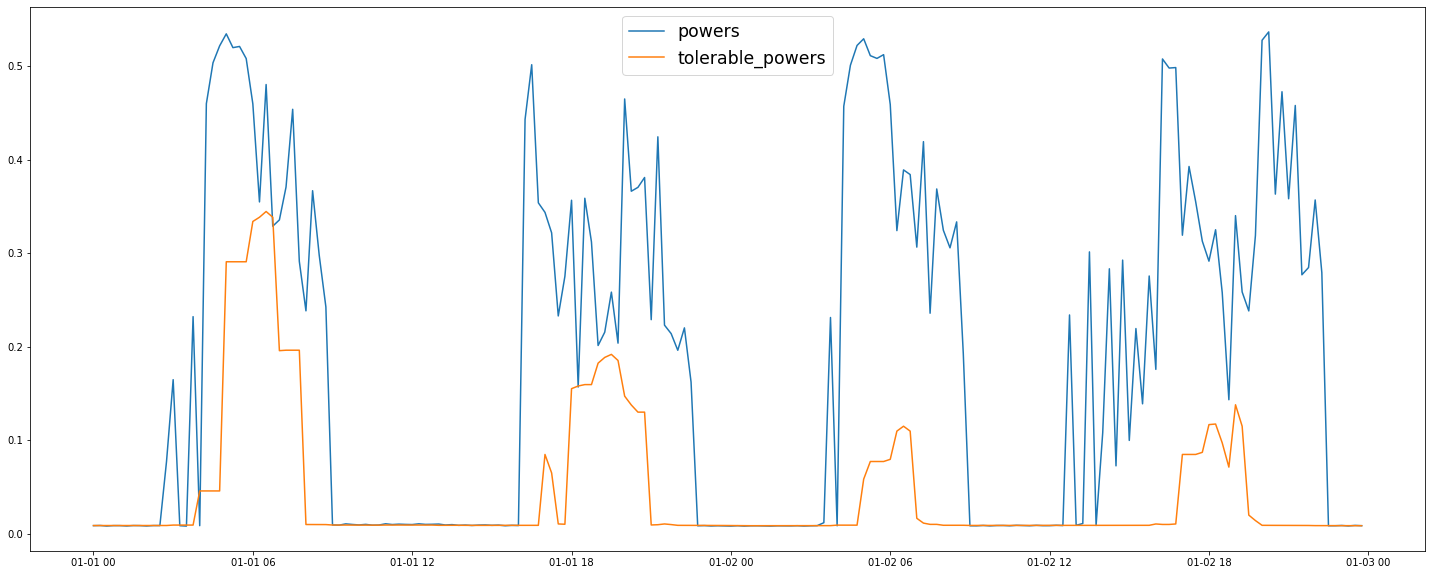

In [23]:
plt.figure(figsize=(25,10))
plt.plot(dataset['Furnace'].iloc[:96*2])
plt.plot(tolerable_power_df['Furnace'].iloc[:96*2])
# plt.plot(dataset['temperature'].iloc[:24])
plt.legend(['powers', 'tolerable_powers', 'temperature'], fontsize='xx-large')
plt.show()

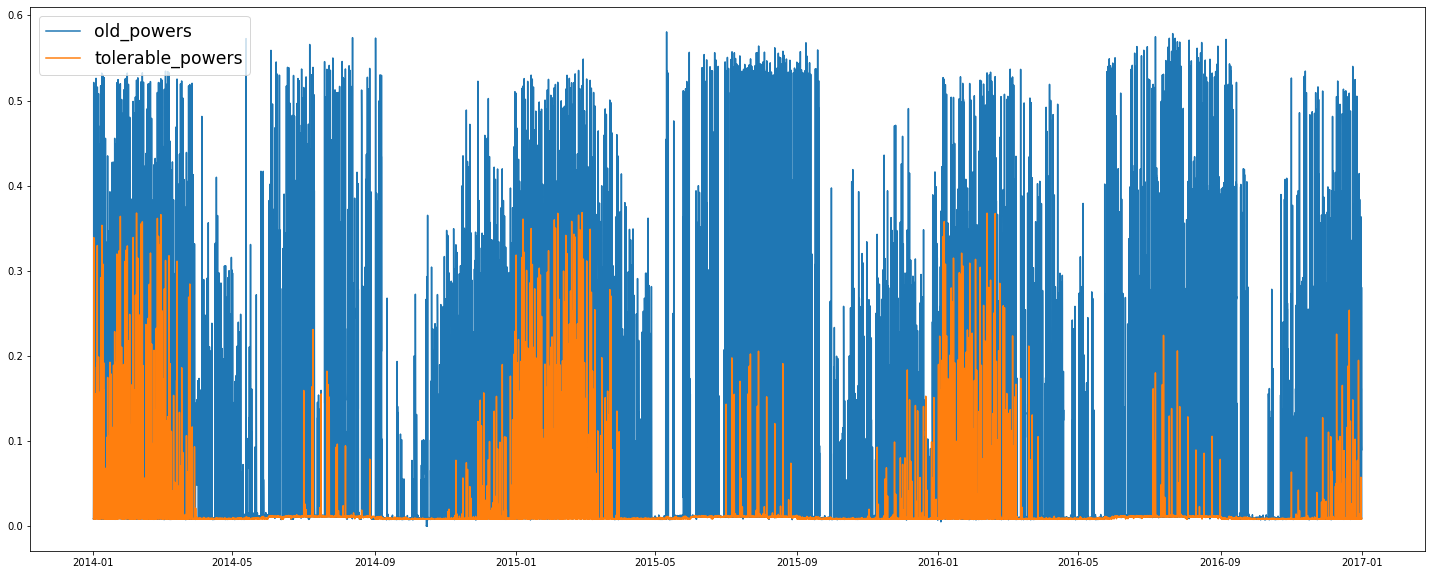

In [24]:
plt.figure(figsize=(25,10))
plt.plot(dataset['Furnace'].resample('H').mean())
plt.plot(tolerable_power_df['Furnace'].resample('H').mean())
# plt.plot(dataset['temperature'].resample('D').mean())
plt.legend(['old_powers', 'tolerable_powers', 'temperature'], fontsize='xx-large')
plt.show()

In [25]:
# 容忍值
tolerable_power_df['Furnace'].describe()

count    105204.000000
mean          0.016824
std           0.036156
min           0.007951
25%           0.008533
50%           0.008983
75%           0.010758
max           0.370100
Name: Furnace, dtype: float64

In [26]:
# 原始用電
dataset['Furnace'].describe()

count    105204.000000
mean          0.095905
std           0.162381
min           0.000000
25%           0.008800
50%           0.010776
75%           0.114442
max           0.629318
Name: Furnace, dtype: float64

## Find appliance on/off threshold

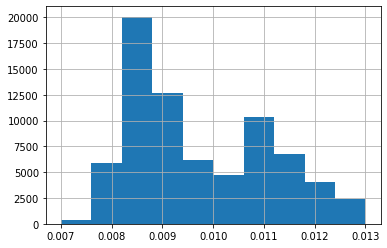

In [28]:
dataset.loc[(dataset.loc[:, 'Furnace'] < 0.015) & (dataset.loc[:, 'Furnace'] > 0.007), 'Furnace'].hist()

## Filter closed furnace (<0.013)

In [29]:
dataset.drop(dataset.loc[dataset.loc[:, 'Furnace'] < 0.013, :].index, inplace=True)

In [30]:
tolerable_power_df.loc[tolerable_power_df.loc[:, 'Furnace'] < 0.013, 'Furnace'] = 0

In [31]:
(tolerable_power_df == 0).sum()

Furnace    98908
dtype: int64

## DataFrame to CSV

In [32]:
dataset.to_csv('F_features.csv', columns=COL_WEATHER+COL_DATE+["Furnace"])

In [34]:
tolerable_power_df.to_csv('F_furnace_tolerable_power.csv')